# 중심 경향성

## 평균

In [4]:
import numpy as np
data = [10,20,30,40,50,60]
np.mean(data)

np.float64(35.0)

In [5]:
# 가중평균
prices = [5000,9000]
counts = [8,2]
weighted_mean = np.average(prices, weights=counts)
weighted_mean

np.float64(5800.0)

In [6]:
# 조종사의 평균점수
data = {
    '점수': [97, 94, 92, 91, 90, 89, 78, 60],
    '인원수': [4, 11, 12, 21, 30, 12, 9, 1]  # 총 100명 
}
weighted_score = np.average(data['점수'],  weights=data['인원수'])
weighted_score

np.float64(89.67)

In [7]:
total_people = sum(data['인원수'])
print(f'#전체평가대상자 수 {total_people}')
print(f'#평균점수 {weighted_score}')
risk_score = weighted_score
print(f'#기준미달 {risk_score}인 조종사가 명입니다')

#전체평가대상자 수 100
#평균점수 89.67
#기준미달 89.67인 조종사가 명입니다


In [9]:
initial = 100  
# 시나리오 적용
step1 = initial * 2.0      # +100%
step2 = step1 * 0.5        # -50%
final = step2

print(f"초기: {initial}만원")
print(f"1차 후: {step1}만원")
print(f"최종: {final}만원")
print(f"\n실제 변화: {((final/initial - 1) * 100):.1f}%")

# 산술평균
arithmetic = (100 + (-50)) / 2
print(f"산술평균: {arithmetic:.1f}%")

# 기하평균
geometric = (np.sqrt(2.0 * 0.5) - 1) * 100
print(f"기하평균: {geometric:.1f}%")

초기: 100만원
1차 후: 200.0만원
최종: 100.0만원

실제 변화: 0.0%
산술평균: 25.0%
기하평균: 0.0%


In [8]:
#import numpy as np
from scipy import stats

# 1. 데이터: 갈 때 100km/h, 올 때 50km/h
speeds = [100, 50]

# 2. 평균 계산 비교
# A. 산술평균 (오답)
arithmetic = np.mean(speeds)

# B. 조화평균 (정답)
harmonic = stats.hmean(speeds)

# 3. 결과 리포트
print(f"데이터: {speeds}")
print("-" * 35)
print(f"1. [❌ 오류] 산술평균: {arithmetic:.2f} km/h")
print("-" * 35)
print(f"2. [✅ 정답] 조화평균: {harmonic:.2f} km/h")
print(f"   >> 해석: '느린 구간(50) 때문에 전체 효율이 급감했습니다.'")
print(f"   >> 실제 물리적 평균 속도는 66.67km/h가 맞습니다.")

데이터: [100, 50]
-----------------------------------
1. [❌ 오류] 산술평균: 75.00 km/h
-----------------------------------
2. [✅ 정답] 조화평균: 66.67 km/h
   >> 해석: '느린 구간(50) 때문에 전체 효율이 급감했습니다.'
   >> 실제 물리적 평균 속도는 66.67km/h가 맞습니다.


In [9]:
# 중앙값
data = [10, 20, 30, 40, 50]
median_value = np.median(data)
print(median_value)  # 30

30.0


In [10]:
scores = [65, 75, 80, 85, 95]

# 백분위수 계산
p25 = np.percentile(scores, 25)  # Q1
p50 = np.percentile(scores, 50)  # 중앙값
p75 = np.percentile(scores, 75)  # Q3

print(f"25번째 백분위수: {p25}")  # 75.0
print(f"50번째 백분위수(중앙값): {p50}")  # 80.0
print(f"75번째 백분위수: {p75}")  # 85.0
print(f"사분위간 범위(IQR): {p75 - p25}")  # 10.0

25번째 백분위수: 75.0
50번째 백분위수(중앙값): 80.0
75번째 백분위수: 85.0
사분위간 범위(IQR): 10.0


In [11]:
# 최빈값
scores = [70, 80, 80, 90, 60, 80, 70]
counts = {}

for x in scores:
    if x in counts:
        counts[x] += 1
    else:
        counts[x] = 1

counts
{70: 2, 80: 3, 90: 1, 60: 1}

mode = max(counts, key=counts.get)# 함수로 최빈값 구하기
mode

80

In [12]:
# 판다스로 최빈값 구하기 
import pandas as pd
score_data = pd.Series(scores)
#pd.DataFrame(scores)
score_data.mode()

0    80
dtype: int64

# 변동성 -범위

In [13]:
data1 = [50,50,50,50,50]
data2 = [10,30,50,70,90]
data3 = [30,40,50,60,70]

np.mean(data1), np.mean(data2), np.mean(data3)

(np.float64(50.0), np.float64(50.0), np.float64(50.0))

In [14]:
data2_range = max(data2)-min(data2)
data3_range = max(data3)-min(data3)
data2_range , data3_range

(80, 40)

# 변동성 - 분산

In [15]:
data = [10, 20, 30, 40, 50]
variance_value = np.var(data)
print(variance_value)  # 200.0

200.0


In [16]:
np.var(data2), np.var(data3)

(np.float64(800.0), np.float64(200.0))

# 변동성 - 빈도분포표

In [17]:
data = [
    [47, 10, 31, 25, 20], 
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21], 
    [41, 14, 16, 26, 21], 
    [7, 30, 17, 27, 24], 
    [6, 30, 16, 29, 24], 
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20], 
    [35, 34, 18, 29, 21], 
    [36, 32, 16, 27, 20]
]
data

[[47, 10, 31, 25, 20],
 [2, 11, 31, 25, 21],
 [44, 14, 15, 26, 21],
 [41, 14, 16, 26, 21],
 [7, 30, 17, 27, 24],
 [6, 30, 16, 29, 24],
 [35, 32, 15, 29, 23],
 [38, 33, 19, 28, 20],
 [35, 34, 18, 29, 21],
 [36, 32, 16, 27, 20]]

In [18]:
import pandas as pd
df = pd.DataFrame(data, columns=['A','B','C','D','E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


(array([[ 2.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  2.,  2.],
        [ 0.,  1.,  3.,  0.,  0.,  0.,  5.,  1.,  0.,  0.],
        [ 0.,  0.,  2.,  6.,  0.,  0.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  7.,  3.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.]]),
 array([ 2. ,  6.5, 11. , 15.5, 20. , 24.5, 29. , 33.5, 38. , 42.5, 47. ]),
 <a list of 5 BarContainer objects>)

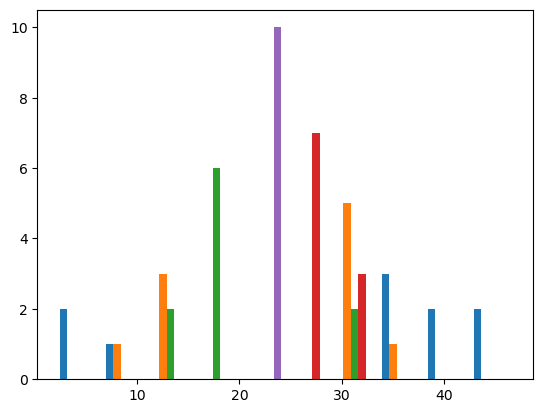

In [19]:
import matplotlib.pyplot as plt
plt.hist(df)

(array([2., 1., 0., 0., 0., 0., 0., 3., 2., 2.]),
 array([ 2. ,  6.5, 11. , 15.5, 20. , 24.5, 29. , 33.5, 38. , 42.5, 47. ]),
 <BarContainer object of 10 artists>)

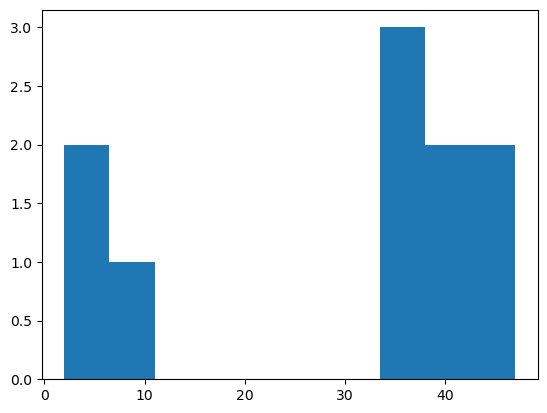

In [20]:
plt.hist(df['A']) # A만 꺼내서 histogram을 그려라

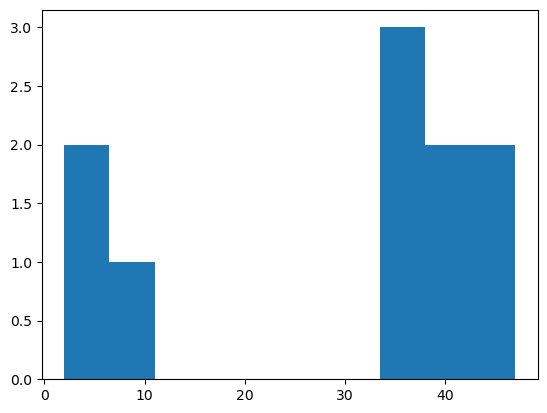

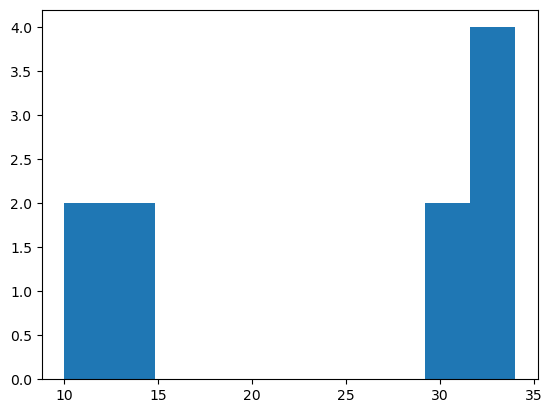

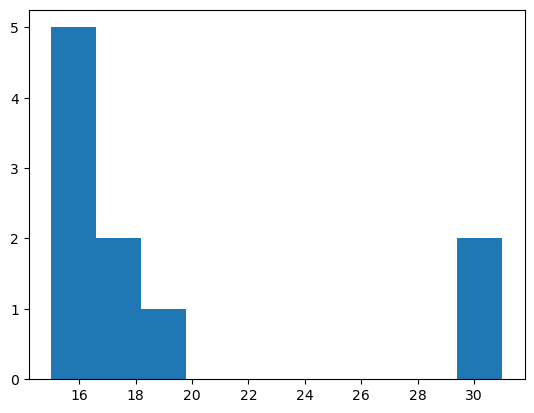

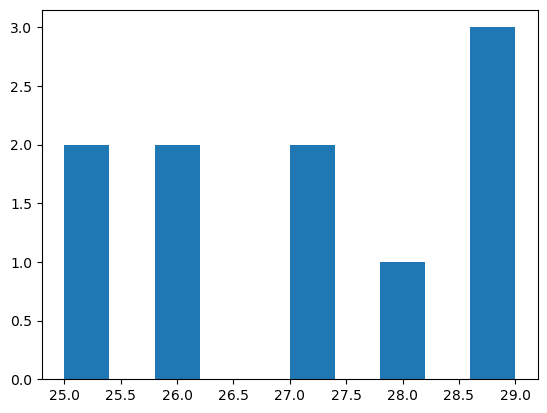

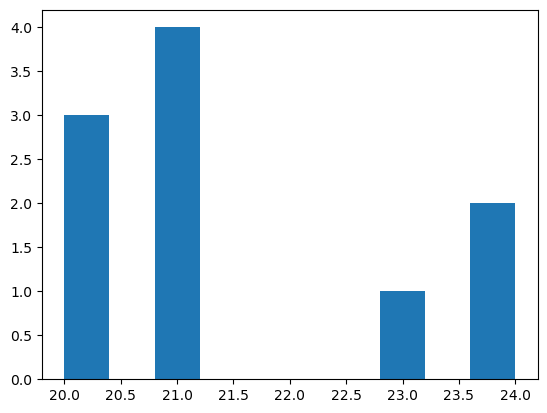

In [21]:
for col in df:
    #print(col)
    plt.hist(df[col])
    plt.show()

## 첨도

* 양의 첨도 : 정규분포보다 값의 크기만큼 중앙이 뾰족하며 꼬리가 두껍고 길다.
* 음의 첨도 : 정규분포보다 값의 크기만큼 중앙이 눌려있다. 꼬리가 얇고 짧다 즉, 평균 주변에 고르게 분포

In [22]:
from scipy.stats import kurtosis
positive_kurtosis = [
    50, 50, 50, 50, 50,
    48, 52,
    35, 65
]
negative_kurtosis = [
    42, 44, 46, 48,
    52, 54, 56, 58
]
pos_kurtosis_value = kurtosis(positive_kurtosis )
neg_kurtosis_value = kurtosis(negative_kurtosis )

print(pos_kurtosis_value, neg_kurtosis_value )

1.345540702885148 -1.4266666666666667


# 그래프

(array([1., 0., 0., 0., 1., 6., 0., 0., 0., 1.]),
 array([35., 38., 41., 44., 47., 50., 53., 56., 59., 62., 65.]),
 <BarContainer object of 10 artists>)

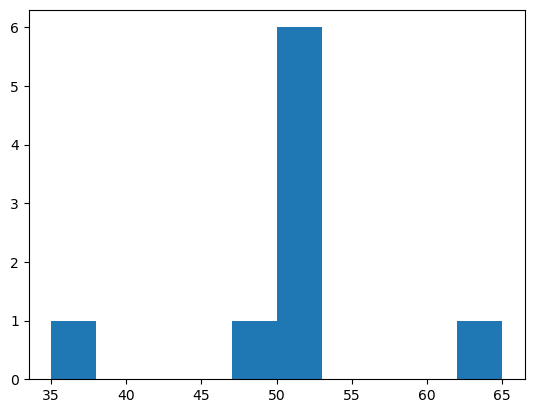

In [23]:
plt.hist(positive_kurtosis)

(array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1.]),
 array([42. , 43.6, 45.2, 46.8, 48.4, 50. , 51.6, 53.2, 54.8, 56.4, 58. ]),
 <BarContainer object of 10 artists>)

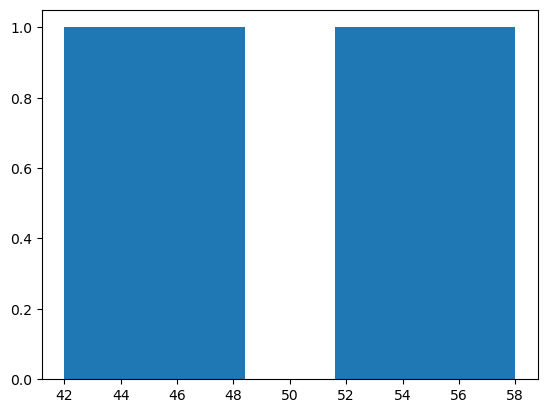

In [24]:
plt.hist(negative_kurtosis)

In [1]:
from scipy.stats import skew

data = [10, 20, 30, 40, 100]  # 오른쪽으로 치우친 데이터
skew_value = skew(data)
print(skew_value)  # 양수 = 양의 왜도 => 오른쪽 꼬리

1.1384199576606167


<BarContainer object of 5 artists>

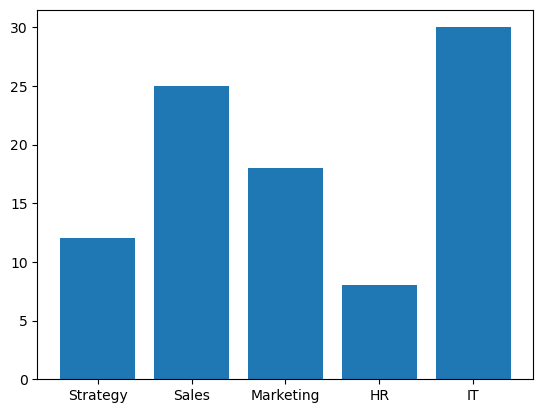

In [3]:
import matplotlib.pyplot as plt

teams = ['Strategy', 'Sales', 'Marketing', 'HR', 'IT']
score_2025 = [12, 25, 18, 8, 30]
plt.bar(teams, score_2025, label ='2025')

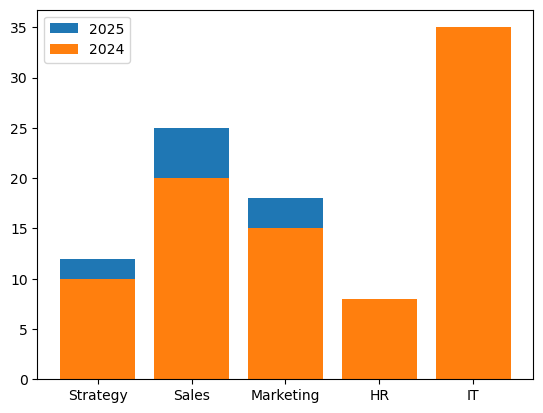

In [5]:
#그룹막대
score_2024 = [10, 20, 15, 8, 35]
plt.bar(teams, score_2025, label ='2025')
plt.bar(teams, score_2024, label ='2024')
plt.legend()

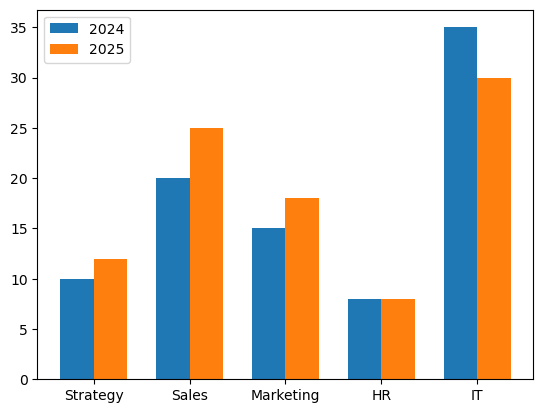

In [6]:
import numpy as np
x = np.arange(len(teams))  # 팀별 위치 (0, 1, 2, 3, 4)
width = 0.35  # 막대 하나의 너비
plt.bar(x - width/2, score_2024, width, label='2024') # 왼쪽으로 이동
plt.bar(x + width/2, score_2025, width, label='2025') # 오른쪽으로 이동

plt.xticks(x, teams) # x축 눈금을 팀 이름으로 변경(안하면 숫자 0~4로 나옴) 
plt.legend() # 범례 나타내는 부분

plt.show()

([<matplotlib.patches.Wedge at 0x1de5c030ca0>,
 [Text(0.17207793356064993, 1.0864571711675968, 'Company A'),
  Text(-0.8899184718302892, -0.6465640830538323, 'Company B'),
  Text(0.4993897495105265, -0.9801070748055101, 'Company C'),
  Text(1.0461621838648125, -0.339918644753721, 'Others')],
 [Text(0.09386069103308177, 0.5926130024550527, '45.0%'),
  Text(-0.485410075543794, -0.352671318029363, '30.0%'),
  Text(0.2723944088239235, -0.5346038589848237, '15.0%'),
  Text(0.5706339184717159, -0.185410169865666, '10.0%')])

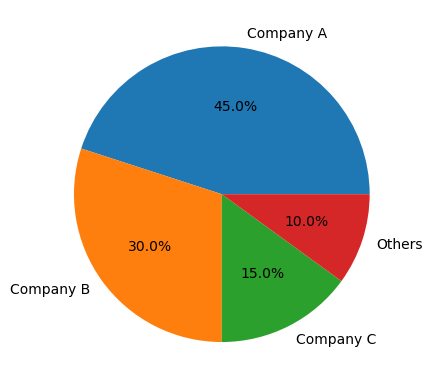

In [7]:
#원도표
#시장상황 데이터 준비
labels = ['Company A', 'Company B', 'Company C', 'Others']
sizes = [45, 30, 15, 10]  # 합이 100이 되게 하는 것이 일반적
plt.pie(sizes, labels=labels, autopct='%.1f%%') #autopct=형식지정(이 경우, 소숫점한자리%로 표시)

([<matplotlib.patches.Wedge at 0x1de5c07cd90>,
 [Text(0.17207793356064993, 1.0864571711675968, 'Company A'),
  Text(-0.8899184718302892, -0.6465640830538323, 'Company B'),
  Text(0.4993897495105265, -0.9801070748055101, 'Company C'),
  Text(1.0461621838648125, -0.339918644753721, 'Others')],
 [Text(0.09386069103308177, 0.5926130024550527, '45.0%'),
  Text(-0.485410075543794, -0.352671318029363, '30.0%'),
  Text(0.2723944088239235, -0.5346038589848237, '15.0%'),
  Text(0.5706339184717159, -0.185410169865666, '10.0%')])

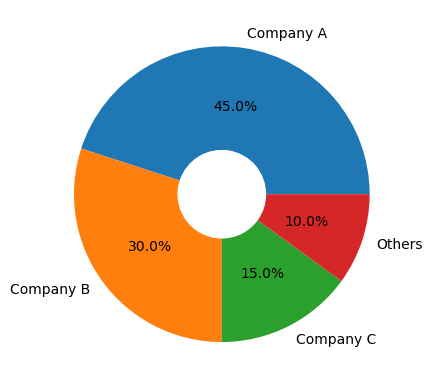

In [8]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width':0.7})

In [13]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_4652\3396265548.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() # 범례 표시


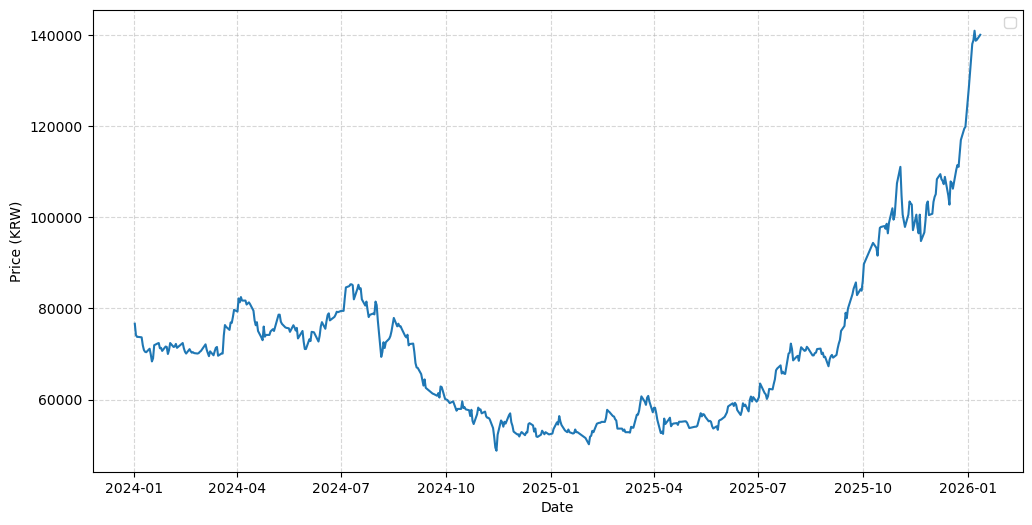

In [9]:
import yfinance as yf
ticker = '005930.KS'
df = yf.download(ticker, start='2024-01-01') # 2024년1월1일부터 현재까지 일일주가데이터를 df(데이터프레임)라는 변수에 저장
plt.figure(figsize=(12, 6)) # 크기: 가로 12인치, 세로 6인치 비율
plt.plot(df.index, df['Close']) # 그려라: x축=날짜, y축=종가
plt.xlabel('Date') # x축아래 라벨
plt.ylabel('Price (KRW)') # y축 옆 라벨
plt.grid(True, linestyle='--', alpha=0.5) # 그리드추가, 점선, 투명도
plt.legend() # 범례 표시

In [24]:
#히스토그램
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
np.random.seed(42) #'특별한 의미가 없는 무작위 숫자'가 필요할 때 42를 쓰는 것이 하나의 관습
data = np.random.normal(loc=50000, scale=15000, size=1000) # 평균50,000, 표준편차15,000인 정규분포를 따르는 데이터 1,000개를 랜덤 생성
len(data)

1000

(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([  1380.98989896,  12021.98814505,  22662.98639114,  33303.98463722,
         43944.98288331,  54585.98112939,  65226.97937548,  75867.97762156,
         86508.97586765,  97149.97411374, 107790.97235982]),
 <BarContainer object of 10 artists>)

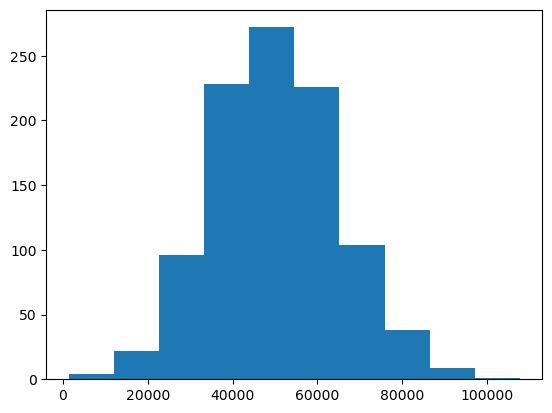

In [17]:
plt.hist(data)

(array([  1.,   0.,   3.,   3.,   6.,  13.,  19.,  37.,  40.,  55.,  75.,
         98.,  76.,  94., 102.,  86.,  84.,  56.,  45.,  31.,  28.,  23.,
         12.,   3.,   7.,   1.,   1.,   0.,   0.,   1.]),
 array([  1380.98989896,   4927.98931433,   8474.98872969,  12021.98814505,
         15568.98756041,  19115.98697577,  22662.98639114,  26209.9858065 ,
         29756.98522186,  33303.98463722,  36850.98405258,  40397.98346794,
         43944.98288331,  47491.98229867,  51038.98171403,  54585.98112939,
         58132.98054475,  61679.97996012,  65226.97937548,  68773.97879084,
         72320.9782062 ,  75867.97762156,  79414.97703693,  82961.97645229,
         86508.97586765,  90055.97528301,  93602.97469837,  97149.97411374,
        100696.9735291 , 104243.97294446, 107790.97235982]),
 <BarContainer object of 30 artists>)

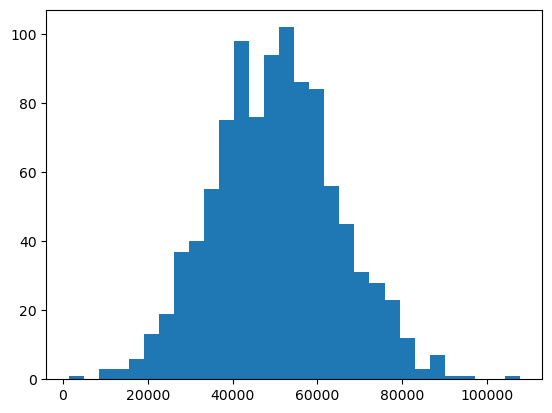

In [20]:
plt.hist(data,bins=30) # 막대개수를 30으로 늘림

C:\Users\Admin\AppData\Local\Temp\ipykernel_4652\827945609.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,labels=labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x1de5e84ad10>,
 'caps': [<matplotlib.lines.Line2D at 0x1de5e84b1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de5e84aa10>,
 'medians': [<matplotlib.lines.Line2D at 0x1de5e84b7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de5e84baf0>,
 'means': []}

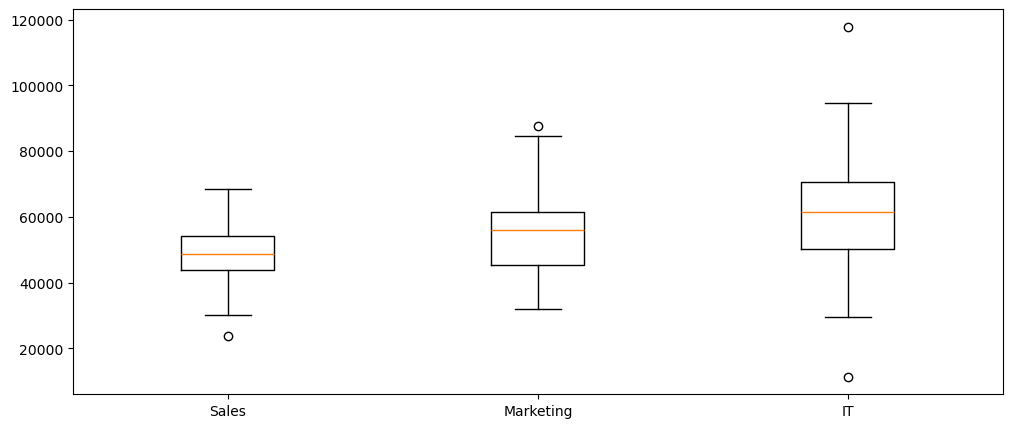

In [28]:
# 상자도표
np.random.seed(42)

sales = np.random.normal(50000, 10000, 100) # 랜덤.정규분포 (평균, 표준편차, 갯수)
marketing = np.random.normal(55000, 12000, 100)
it = np.random.normal(60000, 15000, 100)

data = [sales, marketing, it] #numpy array의 리스트
labels = ['Sales', 'Marketing', 'IT']
plt.figure(figsize=(12,5))
plt.boxplot(data,labels=labels)

# 동그라미는 이상치 의미

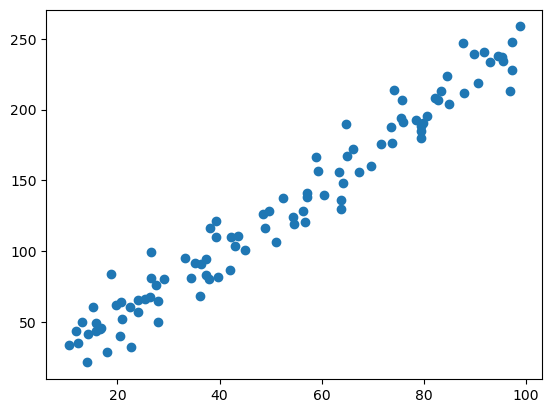

In [32]:
# 산점도 [광고비와 매출액 관계]
np.random.seed(42)
ad_spend = np.random.uniform(10, 100, 100) # 광고비 : 랜덤.균등분포 
sales = 2.5 * ad_spend + np.random.normal(0, 15, 100)  # 매출액(만원) : 랜덤.정규분포
plt.scatter(ad_spend,sales)

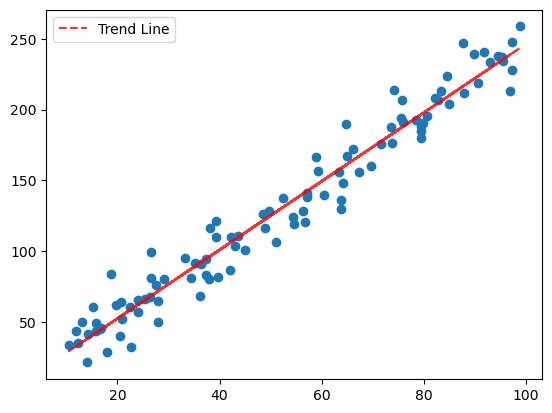

In [62]:
plt.scatter(ad_spend,sales)
# 추세선 추가
z = np.polyfit(ad_spend, sales, 1)
p = np.poly1d(z)
plt.plot(ad_spend, p(ad_spend), "r--", alpha=0.8, label='Trend Line')
# x값 x값들을 z함수에 넣어 예측된 y값 계산, 선의 색상은 Red, 스타일은 -, 선의 투명도 (1에 가까울수록 진함), 범례에 표시될 이름
plt.legend()

# 상관분석 실습

In [38]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# 이 데이터셋의 표준 컬럼명 (직접 지정 필요)
column_names = [
    'CRIM',    # 1인당 범죄율
    'ZN',      # 25,000평방피트 초과 주거 지역 비율
    'INDUS',   # 비소매 상업 지역 비율
    'CHAS',    # 찰스강 더미 변수 (1: 강 경계, 0: 아님)
    'NOX',     # 일산화질소 농도
    'RM',      # 주택당 평균 방 개수
    'AGE',     # 1940년 이전에 건축된 소유 주택 비율
    'DIS',     # 5개 보스턴 고용 센터까지의 가중 거리
    'RAD',     # 방사형 고속도로 접근성 지수
    'TAX',     # 10,000달러당 재산세율
    'PTRATIO', # 학생-교사 비율
    'B',       # 흑인 인구 비율 (현재는 윤리적 이슈로 사용 지양 권고되기도 함)
    'LSTAT',   # 하위 계층 비율 (%)
    'MEDV'     # 본인 소유 주택 가격(중앙값) - 타겟 변수
]

In [40]:
import pandas as pd
df = pd.read_csv(url, sep='\s+', header=None, names=column_names)

In [41]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [42]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


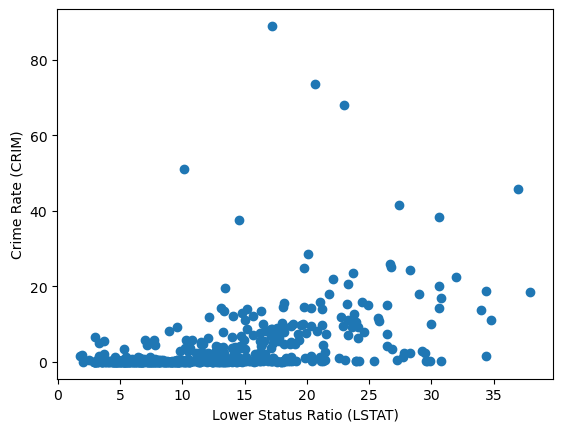

In [56]:
plt.scatter(df['LSTAT'],df['CRIM3'])
plt.xlabel('Lower Status Ratio (LSTAT)')
plt.ylabel('Crime Rate (CRIM)')
plt.show()